#Web Scraping using BeautifulSoup
>Web scraping which also known as web harvesting or web data extraction. It is a computer software technique of extracting information from websites.

>With the help of BeautifulSoup library, it is easier to do HTML parsing.
---
##Table of Content
* Single page Web Scraping

* Multiple pages Web Scraping
---
We will first try to extract information from one page then only scrape from multiple pages.

In [1]:
# Import all needed library
from bs4 import BeautifulSoup # Web Scraping Library 
import requests # URL from your browser
import json # Execute the Script

## Web Scraping on single page

In [2]:
# Search for target news website URL
URL = 'https://www.thestar.com.my/news/nation/2020/10/02/sources-all-sabah-schools-to-close-two-weeks-after-teacher-dies-from-covid-19'

In [ ]:
page_response = requests.get(URL, timeout=10) # Request and receive response

page_content = BeautifulSoup(page_response.content, "html.parser") # Use BeautifulSoup to parse the information

In [49]:
title_content = page_content.select('h1') # Select h1 tag

In [5]:
main_title = title_content[0].text.strip() # Remove tag and remove space

In [6]:
main_title # Main title variable

'All Sabah schools may close for two weeks after teacher dies from suspected Covid-19 infection (updated)'

In [51]:
body_content = page_content.find('div', {'id' : 'story-body'})# Find all div tag which id is 'story-body'
body_list = body_content.find_all('p') # Find all p tag
print(f'Body content with tag : {body_list[0]}')

# for x in body_list:   # Remove tag and space using for loop
#   test.append(x.text.strip())

body_list = [x.text.strip() for x in body_list]  # Remove tag and space using list comprehension
print(f'Body content without tag : {body_list[0]}')

Body content with tag : <p>In Mariah Carey's new memoir, the Grammy-winning artist makes one thing clear: She sees "no benefit to protect people who didn't protect me."</p>
Body content without tag : In Mariah Carey's new memoir, the Grammy-winning artist makes one thing clear: She sees "no benefit to protect people who didn't protect me."


In [31]:
data = json.loads(page_content.find('script', type='application/ld+json').text) # Execute script and save as json

# Save as dictionary with name as img
img = {
    'src' : data['thumbnailUrl'],
    'keywords' : data['keywords']
}

print(data)
print(img)

{'@context': 'http://schema.org', '@type': 'NewsArticle', 'headline': 'All Sabah schools may close for two weeks after teacher dies from suspected Covid-19 infection (updated)', 'articleSection': 'News', 'creator': ['LEE CHONGHUI', 'STEPHANIE LEE'], 'thumbnailUrl': 'https://apicms.thestar.com.my/uploads/images/2020/10/02/883418.jpg', 'dateCreated': '2020-10-02T08:09:00.000Z', 'url': 'https://www.thestar.com.my/news/nation/2020/10/02/sources-all-sabah-schools-to-close-two-weeks-after-teacher-dies-from-covid-19', 'keywords': ['/News/Nation', 'Covid-19 Watch', 'Covid-19', 'Coronavirus', 'Teacher', 'Schools', 'Close', 'Death']}
{'src': 'https://apicms.thestar.com.my/uploads/images/2020/10/02/883418.jpg', 'keywords': ['/News/Nation', 'Covid-19 Watch', 'Covid-19', 'Coronavirus', 'Teacher', 'Schools', 'Close', 'Death']}


In [32]:
# Save as dictionary with name as news
news = {
    'title' : main_title,
    'body' : body_list,
    'image' : img,
}
news

{'body': ['PETALING JAYA: All schools in Sabah could be closed for two weeks following the death of a teacher on Friday (Oct 2) due to suspected Covid-19 infection, according to a source.',
  'Confirmation is pending from the Education Ministry.',
  "Meanwhile, Sabah Education Department (JPN) director Dr Mistrine Radin said details of the teacher's death were confidential.",
  'Dr Mistirine confirmed that a male teacher had died but she was unable to give further details.',
  'She said all 50 schools in the district had been closed due to an enhanced movement control order (MCO) taking effect until Oct 12.',
  'A check with the Semporna Hospital in Sabah confirmed that a teacher had died there.',
  'Semporna is among the four red zone districts under enhanced MCO.',
  'There are a total of 388 Covid-19 cases in Semporna as of Oct 1. The other red zones are Tawau with 781 cases, Lahad Datu (304) and Kunak 149 cases.',
  ''],
 'image': {'keywords': ['/News/Nation',
   'Covid-19 Watch',


## Multiple pages Web Scraping

In [52]:
URL = 'https://www.thestar.com.my/'
page_response = requests.get(URL, timeout=5)
page_content = BeautifulSoup(page_response.content, "html.parser")

url_list = page_content.find_all('a', {'data-list-type' : 'Featured Stories'}) # Get all the targeted url


news_list = []
for news in url_list:   # Loop and extract information in each url
  href = news['href']
  page_response = requests.get(href, timeout=5)
  page_content = BeautifulSoup(page_response.content, 'html.parser')
  title_content = page_content.select('h1')
  main_title = title_content[0].text.strip()
  body_content = page_content.find('div', {'id' : 'story-body'})
  body_list = body_content.find_all('p')

  # for x in body_list:   # Remove tag and space using for loop
  #   test.append(x.text.strip())

  body_list = [x.text.strip() for x in body_list]  # Remove tag and space using list comprehension

  
  data = json.loads(page_content.find('script', type='application/ld+json').text)

  img = {
      'src' : data['thumbnailUrl'],
      'keywords' : data['keywords']
  }

  news = {
      'title' : main_title,
      'body' : body_list,
      'image' : img,
  }
  if (news in news_list):
    continue
  else:
    news_list.append(news)

In [53]:
news_list

[{'body': ['PETALING JAYA: Prime Minister Tan Sri Muhyiddin Yassin will be chairing a special Covid-19 meeting on Saturday (Oct 3), says Tan Sri Annuar Musa.',
   'The Federal Territories Minister said this on his Twitter account (@AnnuarMusa) on Friday evening (Oct 2).',
   '"Besok YAB PM sendiri pengerusikan mesyuarat khas COVID-19... Semoga Ada tindakan yg tegas dan segera esok... (Tomorrow the Prime Minister himself will chair a special Covid-19 meeting... may there be stern and immediate actions tomorrow)," he tweeted.',
   'The tweet did not specify where the meeting will be held or who would be involved.',
   'Earlier, Health director-general Tan Sri Dr Noor Hisham Abdullah announced that Malaysia recorded 287 new cases, 128 of which were from the Tembok cluster involving a prison in Kedah.',
   '"From the remaining 159 cases, 113 were detected in Sabah from the already identified clusters, as well as four districts currently under an enhanced movement control order (MCO)," he a

In [54]:
len(news_list)

13

## Result matched with the website
---

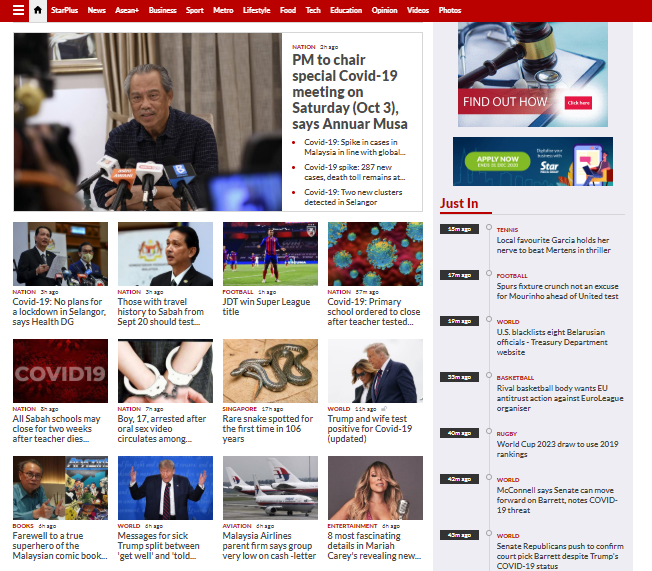